# Dealing with Outliers

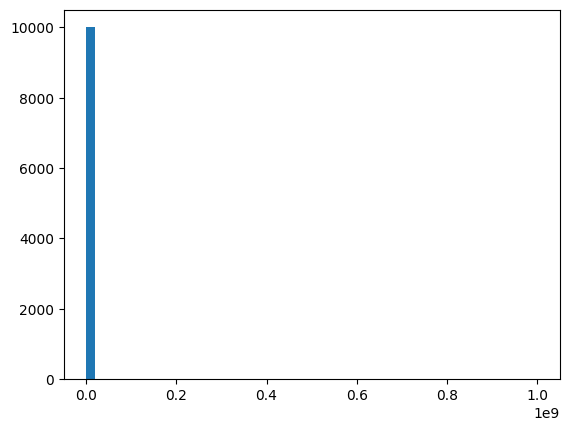

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Mock-Data
incomes = np.random.normal(27000, 15000, 10000)

# add two outliers!
incomes = np.append(incomes, [1000000000, 1000000000])

plt.hist(incomes, 50)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [2]:
incomes.mean()

126737.5201808567

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

## Building a filter-outliers function

10000 filtered and 2 outliers


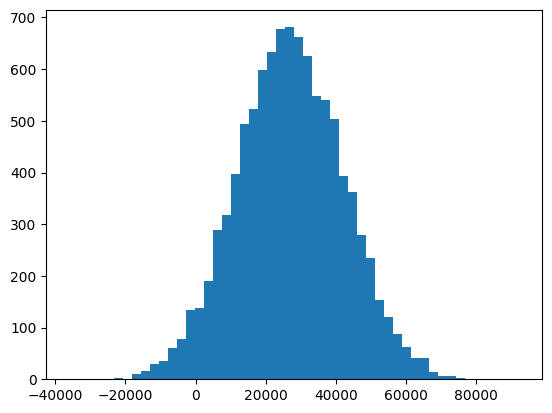

In [15]:
stdDeviationsToConsider = 2
def filter_outliers(data):
    filtered, outliers = [], []

    medianIncome = np.median(data)
    stdDeviation = np.std(data)
    for e in data:
        if medianIncome - stdDeviationsToConsider * stdDeviation < e < medianIncome + stdDeviationsToConsider * stdDeviation:
            filtered.append(e)
        else:
            outliers.append(e)
    return filtered, outliers

filtered, outliers = filter_outliers(incomes)
print(f'{len(filtered)} filtered and {len(outliers)} outliers')

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [4]:
np.mean(filtered)

26750.193932874794